In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import datetime as dt
import os
from matplotlib.backends.backend_pdf import PdfPages
import statistics
import scipy.stats as stats
import math
import tensorflow as tf

In [2]:
# Importing the Dataset
file_names = glob.glob ('./EthernetData/dataset6.csv')
k = 0

# Change these two variables to get different results
#degree change
n = 1
#operating state
op_state = 'Heating'
exclude_state = 'Cooling'

In [3]:
# Given millisecond utc timestamp return time
def tz_from_utc_ms_ts(utc_ms_ts):
    
    # convert from time stamp to datetime
    utc_datetime = dt.datetime.utcfromtimestamp(utc_ms_ts / 1000.)
    
    # getting time from datetime object
    res = utc_datetime.hour + utc_datetime.minute / 60
    if res - 5 < 0:
        res = 24 + (res - 5)
    else:
        res = res - 5
    return res

In [4]:
# Visualising the result as time of day vs cooling time of machine
def plot (time_difference, y, temp_change):
    fig = plt.figure (k)
    ax = plt.subplot ()
    plt.bar (y, time_difference, 0.05, align = 'center', alpha = 1)
    plt.xlabel ('Time of day')
    plt.ylabel ('Time taken for ' + op_state + ' ' + str (temp_change) + ' Degree (in Minutes)')
    ax.set_xticks ([0,5,10,15,20,24])
    ax.set_xticklabels (['00:00', '05:00', '10:00', '15:00', '20:00', '00:00'])
    plt.title (os.path.basename (path))
    plt.show ()
    pp.savefig (fig)
    plt.close (fig)

In [13]:

# Finding time required for temparature change...
import json
def time_to_change_temperature (X, temp_change):
    # Time to cool one degree in minutes
    time_difference = []
    # Factor represts temparature change between cooling/heating on and off.
    factor = 1
    y = []
    curr_temp = 0
    i = 0
    avg_time_to_change = 0
    while i < len(X):

        content = json.loads (X.content[i])
        if 'status' in content and "room_temp" in content["status"]:
            curr_temp = content["status"]["room_temp"]
        
        if 'status' in content and "operating_state" in content["status"] and content["status"]["operating_state"] in [op_state] :
            curr_index = i
            
            hh = tz_from_utc_ms_ts(X.created_date_time[i])
            while i < len(X):
                content = json.loads (X.content[i])
                if 'status' in content and "room_temp" in content["status"]:
                    if(op_state == "Cooling"):
                        factor = curr_temp - content["status"]["room_temp"]
                    else:
                        factor =  content["status"]["room_temp"] - curr_temp
                    
                    if( factor == temp_change):
#                       print(i+1, curr_temp, content["status"]["room_temp"])
                      diff = abs((X.created_date_time[i] - X.created_date_time[curr_index])/(60000))
                      time_difference.append (diff)
                      avg_time_to_change = avg_time_to_change + (diff)
                      y.append(hh)
                      break
                if 'status' in content and "operating_state" in content["status"] and content["status"]["operating_state"] in ["Off", exclude_state, "Fan_Only"]:
                    break
                i=i+1

        i=i+1       
    # print((time_difference))
    if (time_difference):
        mean = (avg_time_to_change/ len(time_difference))
        sd = statistics.stdev(time_difference)
        print('average time to ' + op_state + ' ' + str(temp_change) +'F: ', mean)
        print('Standard deviation ', sd)
    plot (time_difference, y, temp_change) 
    # time_difference.sort()
    # pdf1 = stats.norm.pdf(time_difference, (avg_time_to_change/ len(time_difference)), statistics.stdev(time_difference))
    # plt.plot(time_difference, pdf1)
    return (mean)

average time to Heating 1F:  10.387525030750309
Standard deviation  1.7025088012933218


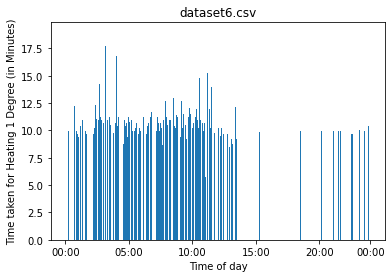

average time to Heating 2F:  18.26623111111111
Standard deviation  3.184160823724819


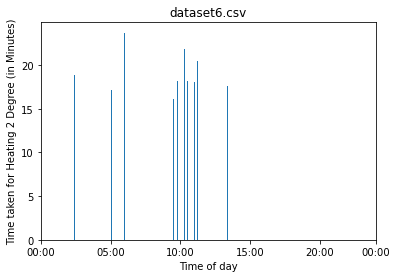

average time to Heating 3F:  23.97619
Standard deviation  3.184307623714211


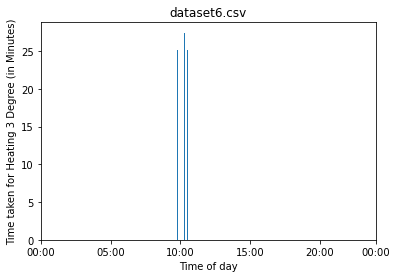

average time to Heating 4F:  32.21185
Standard deviation  1.385499354157326


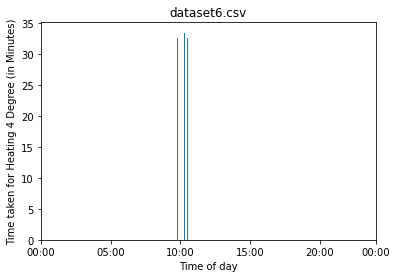

Average time to heat 1F  8.8914166049098
 standard deviation  1.1267357569175382


In [14]:
path = ''
pp = PdfPages ('./Plot' + str (n) + '.pdf')

for file_name in file_names:
    try:
      path = file_name
      dataset = pd.read_csv ((path))
    except:
      continue
    
    X = dataset.iloc[:, :]

    avg1 = time_to_change_temperature(X, 1)
    avg2 = time_to_change_temperature(X, 2)
    avg3 = time_to_change_temperature(X, 3)
    avg4 = time_to_change_temperature(X, 4)
    avg = (avg1 + avg2/2 + avg3/3 + avg4/4) / 4

    print('Average time to heat 1F ', avg)
    print(' standard deviation ', statistics.stdev([avg1, avg2/2, avg3/3, avg4/4]))

pp.close ()

In [11]:
[1] * 4

[1, 1, 1, 1]

In [17]:
dataset

,created_date_time,content
0,1512592768967,"{""status"":{""zwave_signal"":null}}"
1,1512592768987,"{""status"":{""battery"":100}}"
2,1512592769988,"{""status"":{""room_temp"":74}}"
3,1512592776160,"{""status"":{""battery"":100}}"
4,1512592777320,"{""status"":{""fan"":""auto"",""source"":""physical"",""h..."
...,...,...
2546,1515643868747,"{""status"":{""operating_state"":""Heating""}}"
2547,1515644467736,"{""status"":{""room_temp"":72}}"
2548,1515644468774,"{""status"":{""operating_state"":""Pending_Heat""}}"
2549,1515644794612,"{""status"":{""operating_state"":""Fan_Only""}}"
